#### What are Boosting and Bagging?
#### Bagging (Bootstrap Aggregating)
- Definition: Bagging is an ensemble learning technique that combines the predictions from multiple base models (often decision trees) to improve overall performance. It works by training each model on a random subset of the training data (with replacement) and averaging their predictions (for regression) or using majority voting (for classification).

- Key Concept: It reduces variance and helps to prevent overfitting. Each model is built independently, and their predictions are aggregated to form a final prediction.
- Algorithms using Bagging
    - Random Forest: Uses multiple decision trees, each trained on a random subset of the data.
    - Extra Trees (Extremely Randomized Trees): Similar to random forests but uses more random splits, creating greater variance across trees.

#### Boosting
- Definition: Boosting is another ensemble technique that aims to improve the model's performance by combining weak learners (models that perform slightly better than random guessing) sequentially. Each new model focuses on the errors made by the previous ones, assigning more weight to misclassified instances.

- Key Concept: Boosting reduces both bias and variance by focusing on hard-to-predict instances and iteratively improving the model.
- Algorithms using Boosting
    - AdaBoost (Adaptive Boosting): Sequentially trains multiple weak learners (typically decision stumps) with adaptive weights.
    - Gradient Boosting Machines (GBM): Builds trees sequentially, each correcting errors of the previous tree.
    - XGBoost (Extreme Gradient Boosting): An optimized version of gradient boosting that is faster and often more accurate.
    - LightGBM: A gradient boosting variant designed for efficiency, using leaf-wise growth with histogram-based learning.
    - CatBoost: A gradient boosting method with specialized handling for categorical features.
    - Stochastic Gradient Boosting: Adds randomness to GBM by sampling data, making it less prone to overfitting.

Here’s a comparison of popular boosting algorithms, including their working principles, best-use cases, and situations where they may not be ideal.

#### 1. **AdaBoost (Adaptive Boosting)**
   - **How it Works:** AdaBoost sequentially trains weak learners (usually simple decision stumps) by assigning higher weights to misclassified examples, forcing the next learner to focus on those cases.
   - **Best Use Cases:** Effective for binary classification tasks and works well on datasets where misclassifications can be adaptively corrected. Suitable for smaller datasets as it’s relatively lightweight.
   - **Limitations:** Can be prone to overfitting with noisy data since it assigns higher importance to outliers. Not ideal for large datasets as it tends to be slower than other boosting methods.

#### 2. **Gradient Boosting Machines (GBM)**
   - **How it Works:** Builds an ensemble of trees sequentially, with each tree correcting the errors of the previous one by minimizing a specified loss function (e.g., mean squared error for regression).
   - **Best Use Cases:** Works well on complex regression tasks and high-dimensional classification problems. Suitable for structured/tabular data with significant non-linearity.
   - **Limitations:** Tends to be slower on large datasets, especially if hyperparameters are not optimized. Requires careful tuning and is sensitive to overfitting without regularization.

#### 3. **XGBoost (Extreme Gradient Boosting)**
   - **How it Works:** An optimized version of GBM with regularization terms to prevent overfitting, efficient use of memory, and tree pruning based on maximum depth. It also offers parallel processing.
   - **Best Use Cases:** Commonly used in data competitions, especially for large datasets with high dimensionality (thousands of features). Works well for both classification and regression.
   - **Limitations:** Complexity can make it harder to interpret. Not ideal for sparse data or when interpretability is critical. XGBoost is actually well-suited for sparse datasets. It handles sparse data efficiently using a sparse-aware implementation, which skips zero values during computation, and it has optimizations like column block compression. This makes XGBoost suitable for sparse datasets often found in high-dimensional data like text or click-through prediction tasks.

#### 4. **LightGBM**
   - **How it Works:** Uses leaf-wise tree growth, where splits are made to the leaf with the highest loss, making it highly efficient. LightGBM also uses histogram-based learning to speed up computations.
   - **Best Use Cases:** Works exceptionally well with large datasets, especially those with many features and instances. Often preferred in real-time applications due to its fast training speed.
   - **Limitations:** Can overfit on small datasets or datasets with high variance. Leaf-wise growth may lead to overfitting if not regulated carefully, especially on smaller datasets.

#### 5. **CatBoost**
   - **How it Works:** Based on gradient boosting with an emphasis on categorical data handling, CatBoost encodes categories uniquely and reduces prediction bias. It applies ordered boosting to minimize overfitting.
   - **Best Use Cases:** Ideal for datasets with many categorical features (e.g., demographic data, recommendation systems). Reduces preprocessing time by handling categorical variables directly.
   - **Limitations:** Slightly slower than LightGBM in training speed. May be overkill for datasets with no categorical data.

#### 6. **Stochastic Gradient Boosting**
   - **How it Works:** A variant of GBM that randomly samples data subsets (rows and columns) in each iteration, making the algorithm less prone to overfitting.
   - **Best Use Cases:** Useful in cases where there is a risk of overfitting, such as on small to medium-sized datasets. Often applied to improve model generalization in high-dimensional settings.
   - **Limitations:** Slower convergence and potentially higher bias compared to deterministic boosting methods. May underperform on simpler tasks where high accuracy is achievable without added stochasticity.

#### Summary Table

| Algorithm             | Best For                                          | Not Ideal For                                |
|-----------------------|---------------------------------------------------|----------------------------------------------|
| **AdaBoost**          | Binary classification, smaller datasets           | Noisy data, large datasets                   |
| **Gradient Boosting** | Complex regression and classification tasks       | Very large datasets, high computational cost |
| **XGBoost**           | Data competitions, high-dimensional data          | highly interpretable tasks      |
| **LightGBM**          | Large datasets, real-time applications            | Small datasets, high-variance data           |
| **CatBoost**          | Categorical data, minimal preprocessing           | Datasets without categorical data            |
| **Stochastic GB**     | Generalization, avoiding overfitting              | Simple tasks, high accuracy without noise    |

Each algorithm has strengths based on data characteristics, computational resources, and task requirements. Adjusting regularization and sampling parameters is often necessary to optimize performance.


#### Random Data Generation for Plotting
We'll generate synthetic data for both boosting and bagging, using a binary classification problem for demonstration.

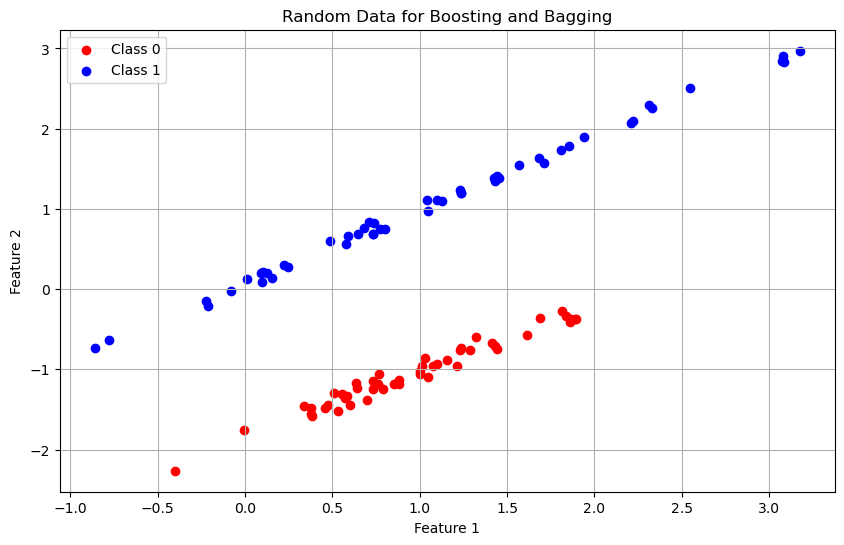

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate random data for classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Plotting the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Random Data for Boosting and Bagging')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


#### Application for Regression or Classification
- Bagging: Good for both regression and classification. It effectively reduces overfitting by averaging multiple models.
- Boosting: Primarily used for both regression and classification but tends to perform better in scenarios where the model needs to correct its mistakes.

#### Implementing Bagging and Boosting from Scratch using Numpy
Bagging Implementation

In [4]:
# Bagging class to implement Bootstrap Aggregating (Bagging) algorithm
class Bagging:
    # Initialization method for the Bagging class
    def __init__(self, base_estimator, n_estimators=10):
        # Set the base model (e.g., decision tree) to be used in each ensemble
        self.base_estimator = base_estimator
        # Define the number of estimators (or models) to create for the ensemble
        self.n_estimators = n_estimators
        # Initialize an empty list to store each model created
        self.models = []

    # Fit method to train the ensemble model
    def fit(self, X, y):
        # Determine the number of samples in the dataset
        n_samples = X.shape[0]
        # Loop to train each model in the ensemble
        for _ in range(self.n_estimators):
            # Generate a bootstrap sample by randomly choosing indices with replacement
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            # Create subset of X and y based on the selected indices
            X_sample, y_sample = X[indices], y[indices]
            # Initialize a new instance of the base estimator (e.g., a decision tree)
            model = self.base_estimator()
            # Train the model on the bootstrap sample
            model.fit(X_sample, y_sample)
            # Append the trained model to the list of models
            self.models.append(model)

    # Predict method to make predictions using the ensemble model
    def predict(self, X):
        # Collect predictions from each model in the ensemble for each sample
        predictions = np.array([model.predict(X) for model in self.models])
        # Perform majority voting across all models' predictions for each sample
        # and return the most common class as the final prediction
        return np.array([np.bincount(pred).argmax() for pred in predictions.T])

# SimpleDecisionTree is a placeholder for a base estimator
class SimpleDecisionTree:
    # Fit method that stores training data (not a real decision tree logic)
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    # Predict method that randomly selects predictions from training labels
    def predict(self, X):
        return np.random.choice(self.y, size=len(X))

# Example usage of the Bagging class with SimpleDecisionTree as the base estimator
bagging_model = Bagging(SimpleDecisionTree, n_estimators=10)
# Train the bagging model on training data X and y
bagging_model.fit(X, y)
# Generate predictions on the dataset X using the ensemble model
bagging_predictions = bagging_model.predict(X)
# Display a few predictions along with the true labels for comparison
bagging_predictions[:5], y[:5]


(array([0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0]))

Boosting Implementation


In [9]:
# Boosting class implementing a generic Boosting algorithm (similar to AdaBoost)
class Boosting:
    # Initialization method for Boosting class
    def __init__(self, base_estimator, n_estimators=10):
        # Set the base model (e.g., decision tree) to be used in the boosting ensemble
        self.base_estimator = base_estimator
        # Define the number of boosting rounds or estimators to create
        self.n_estimators = n_estimators
        # Initialize an empty list to store each model and its weight (alpha)
        self.models = []

    # Fit method to train the boosting ensemble model
    def fit(self, X, y):
        # Get the number of samples in the dataset
        n_samples = X.shape[0]
        # Initialize weights for each sample; initially, weights are uniform
        weights = np.ones(n_samples) / n_samples  

        # Sequentially train base estimators
        for _ in range(self.n_estimators):
            # Initialize the base estimator (e.g., a simple decision tree)
            model = self.base_estimator()
            # Train the model on the entire dataset (potentially with weights)
            model.fit(X, y)  # Assume model can handle weights for training
            # Make predictions on the training data
            predictions = model.predict(X)
            # Determine which predictions are incorrect
            errors = predictions != y

            # Calculate the model weight (alpha) for this estimator based on its accuracy
            alpha = self._calculate_alpha(errors, weights)
            # Update sample weights: increase for misclassified, decrease for correct
            weights *= np.exp(alpha * errors)  
            # Normalize weights so they sum to 1
            weights /= np.sum(weights)

            # Append the current model and its alpha (weight) to the models list
            self.models.append((alpha, model))

    # Method to calculate the weight (alpha) for the current estimator
    def _calculate_alpha(self, errors, weights):
        # Calculate the weighted error rate
        error_rate = np.sum(weights[errors]) / np.sum(weights)
        # Compute alpha based on the error rate, with small constant for numerical stability
        return 0.5 * np.log((1 - error_rate) / (error_rate + 1e-10))

    # Predict method to make predictions on new data
    def predict(self, X):
        # Initialize predictions array to accumulate weighted predictions
        final_prediction = np.zeros(X.shape[0])
        # Sum the weighted predictions from each model in the ensemble
        for alpha, model in self.models:
            final_prediction += alpha * model.predict(X)
        # Return the sign of the final prediction sum (for binary classification)
         # Map -1 to 0 and 1 to 1
        return (np.sign(final_prediction) + 1) // 2

# Example usage of Boosting class with SimpleDecisionTree as base estimator
boosting_model = Boosting(SimpleDecisionTree, n_estimators=10000)
# Train the boosting model on the training data (X, y)
boosting_model.fit(X, y)
# Generate predictions on the dataset X using the boosting model
boosting_predictions = boosting_model.predict(X)
# Display a few predictions alongside the true labels for comparison
boosting_predictions[:5], y[:5]


(array([0., 1., 1., 1., 1.]), array([0, 0, 1, 0, 0]))

#### When to Use and When Not to Use
When to Use:
- Bagging:

    - When the base estimator is high-variance (e.g., decision trees).
    - When you want to reduce overfitting.
    - When you have enough data and want to improve model stability.

- Boosting:

    - When the base estimator is weak and needs improvement.
    - When you want to reduce both bias and variance.
    - When your dataset is small to moderate in size and needs a strong predictive model.

When Not to Use:
- Bagging:

    - When your model is already very stable (e.g., linear regression).
    - When interpretability is a critical requirement, as ensemble models can become complex.
- Boosting:

    - When the model is prone to overfitting on noisy datasets.
    - When computational efficiency is a concern, as boosting is usually slower due to its sequential nature.


#### Visualization of Boosting and Bagging
Visualizing the performance of bagging and boosting can be done through learning curves or error plots. Below is an example of how to visualize the decision boundaries for both models:

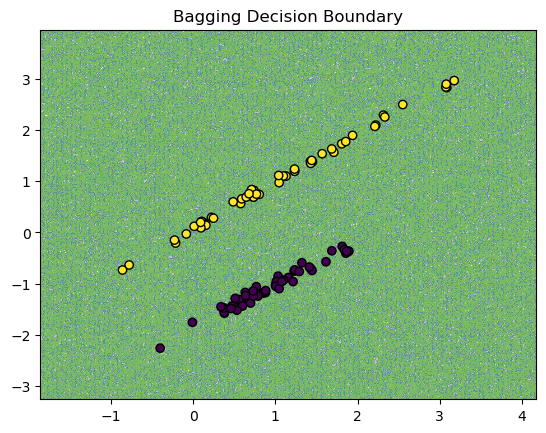

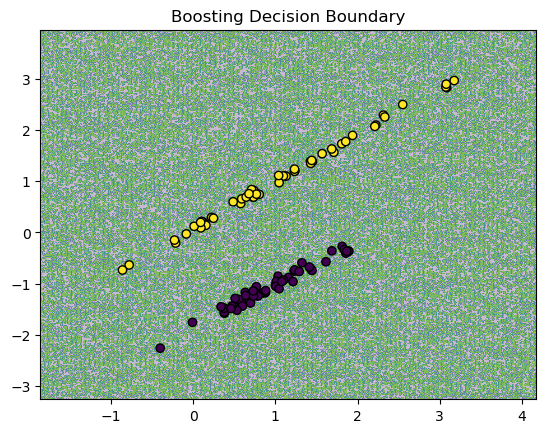

In [6]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

# Visualize Bagging Decision Boundary
bagging_model.fit(X, y)  # Refit to ensure all data is used
plot_decision_boundary(bagging_model, X, y, 'Bagging Decision Boundary')

# Visualize Boosting Decision Boundary
boosting_model.fit(X, y)  # Refit to ensure all data is used
plot_decision_boundary(boosting_model, X, y, 'Boosting Decision Boundary')
